Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.5002 - loss: 0.6934 - val_accuracy: 0.4998 - val_loss: 0.6931
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.4997 - loss: 0.6932 - val_accuracy: 0.5017 - val_loss: 0.6931
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.5001 - loss: 0.6931 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.5010 - loss: 0.6931 - val_accuracy: 0.5006 - val_loss: 0.6932
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.5017 - loss: 0.6931 - val_accuracy: 0.4988 - val_loss: 0.6932
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


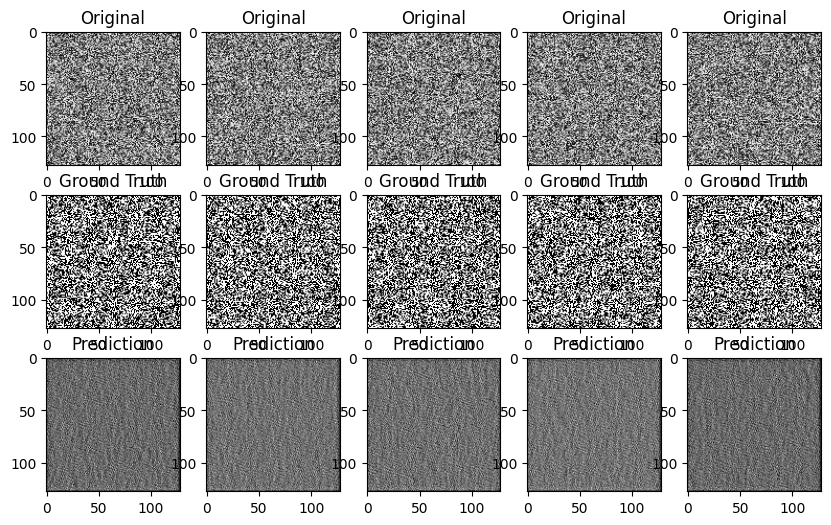


Diagnosis Report:
Patient ID: 1234

Diagnosis Report:

Based on given inputs, patient ID: 1234 has been presenting with fever. Unfortunately, "not bad" is a subjective term and doesn't provide specifics on the physical status or attributes of the patient. For a detailed and accurate diagnosis, more specific and comprehensive physical data will be needed such as blood pressure, heart rate, respiratory rate, temperature, and oxygen saturation. 

Considering the single symptom that has been provided, i.e., fever, this could indicate a variety of conditions. Fever is a common response by the body to an underlying issue, often an infection which could be viral, bacterial or other. It could also indicate an inflammatory condition, some types of cancer, or other medical conditions. 

The provided medical imagery, unfortunately, cannot be analyzed in this context as the system does not support direct image analysis. However, under normal conditions, the analysis of the medical images would he

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import openai
import os

# Set OpenAI API Key securely
api_key = os.getenv("OPENAI_API_KEY")
if not api_key:
    api_key = "OPENAI_API_KEY"
  # Replace with actual API key

client = openai.OpenAI(api_key=api_key)

# AI Diagnosis Report Generation

def generate_diagnosis_report(patient_id, symptoms, physical_data, image_analysis):
    """Generates a diagnosis report based on patient data and AI image analysis."""
    diagnosis_prompt = (
        f"Patient ID: {patient_id}, Symptoms: {symptoms}, Physical Data: {physical_data}. "
        "Based on the provided medical image analysis, generate a diagnosis report."
    )
    
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are a medical assistant AI generating a diagnosis report."},
            {"role": "user", "content": diagnosis_prompt}
        ]
    )
    
    return response.choices[0].message.content

# Function for Input Data Collection
def get_patient_data():
    """Collects necessary medical data for diagnosis."""
    patient_id = input("Enter Patient ID: ")
    symptoms = input("Enter Patient Symptoms: ")
    physical_data = input("Enter Physical Data (age, weight, etc.): ")
    return patient_id, symptoms, physical_data

# AI Agents Integration (PHI Data Processing Placeholder)
def phi_data_processing(data):
    """Function to process PHI-related medical images securely."""
    return data / 255.0  # Normalize image data

# U-Net Model for Image Segmentation
def unet_model(input_size=(128, 128, 1)):
    inputs = Input(input_size)
    
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    
    u1 = UpSampling2D((2, 2))(c3)
    u1 = concatenate([u1, c2])
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(u1)
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(c4)
    
    u2 = UpSampling2D((2, 2))(c4)
    u2 = concatenate([u2, c1])
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(c5)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)
    
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Loading Dataset
def load_medical_data():
    """Simulated function to load medical image data."""
    x_data = np.random.rand(100, 128, 128, 1) * 255  # Simulated grayscale images
    y_data = np.random.randint(0, 2, (100, 128, 128, 1))  # Simulated masks
    
    x_data = phi_data_processing(x_data)
    return train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Get Patient Input
data = get_patient_data()
x_train, x_test, y_train, y_test = load_medical_data()
image_sample = x_test[0]

# Training the Model
model = unet_model()
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=8)

# Visualizing Predictions
def plot_results():
    sample = x_test[:5]
    predictions = model.predict(sample)
    fig, axes = plt.subplots(3, 5, figsize=(10, 6))
    for i in range(5):
        axes[0, i].imshow(sample[i].squeeze(), cmap='gray')
        axes[0, i].set_title("Original")
        axes[1, i].imshow(y_test[i].squeeze(), cmap='gray')
        axes[1, i].set_title("Ground Truth")
        axes[2, i].imshow(predictions[i].squeeze(), cmap='gray')
        axes[2, i].set_title("Prediction")
    plt.show()
    return predictions

predictions = plot_results()

# Generate AI Diagnosis Report
diagnosis_report = generate_diagnosis_report(data[0], data[1], data[2], "Image analysis completed.")
print("\nDiagnosis Report:")
print(diagnosis_report)
